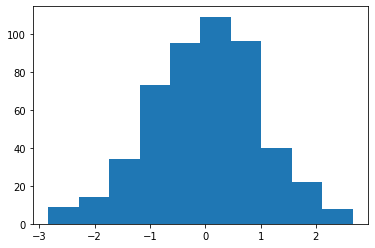

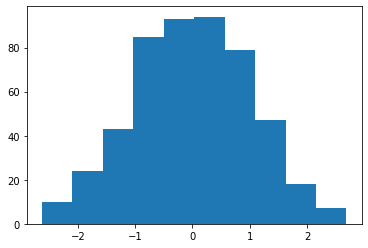

In [ ]:
import pandas
import numpy as np

import matplotlib.pyplot as plt

df = pandas.read_csv('http://pogo.software/me4ml/tensile_strength.csv')

t = np.array(df['Temperature (deg C)'][:]) 
s = np.array(df['Ultimate tensile strength (Pa)'][:])

t_mean = np.mean(t)
t_std = np.std(t)

s_mean = np.mean(s)
s_std = np.std(s)

t_scale = (t-t_mean)/t_std
s_scale = (s-s_mean)/s_std

fig, ax = plt.subplots() 
plt.hist(s_scale) 
plt.show()

fig, ax = plt.subplots() 
plt.hist(t_scale) 
plt.show()


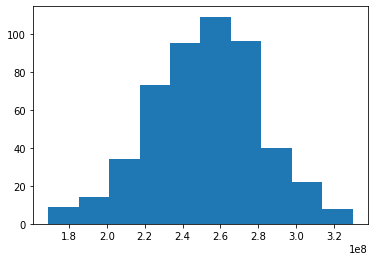

In [ ]:
fig, ax = plt.subplots() 
plt.hist(s) 
plt.show()

In [ ]:
scArray = np.array([[t_mean, s_mean],[t_std, s_std]]) 
np.savetxt('scaleParams.txt',scArray)

#download it from the Colab interface:
from google.colab import files 
files.download('scaleParams.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
loadedScales = np.loadtxt('scaleParams.txt')
print(scArray)
print(loadedScales)

[[2.00656579e+02 2.51960971e+08]
 [9.80022963e+00 2.92063848e+07]]
[[2.00656579e+02 2.51960971e+08]
 [9.80022963e+00 2.92063848e+07]]


(0.0, 1.0)

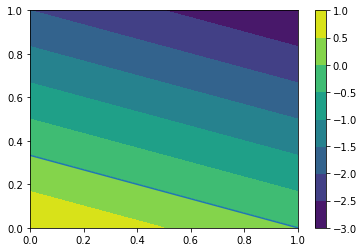

In [5]:
import numpy as np
import matplotlib.pyplot as plt


npx = 200
npy = 200

x1line = np.linspace(0, 1, npx) 
x2line = np.linspace(0, 1, npy)

x1grid, x2grid = np.meshgrid(x1line, x2line) 

Xgrid = np.array([x1grid, x2grid]).reshape([2,npx*npy]).T

w = np.array([-1, -3])
w0 = 1
g = np.matmul(w, Xgrid.T) + w0

g = np.reshape(g, [npx, npy])

yDiscr = (-x1line + 1) / 3


fig, ax = plt.subplots()
plt.contourf(x1line, x2line, g)
plt.plot(x1line, yDiscr)
plt.colorbar()
plt.xlim(0, 1)
plt.ylim(0, 1)

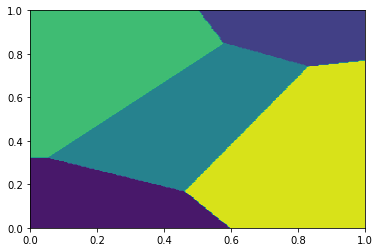

In [ ]:
a1 = np.array([[1.3, -1, -3]])
a2 = np.array([[-2, 1, 2]])
a3 = np.array([[0.3, 0.1, -0.1]])
a4 = np.array([[0, -1, 1]])
a5 = np.array([[-0.2, 1.5, -1]])

#Ygrid is defined as the same as Xgrid, except it has 1 
#at the beginning - this therefore adds a column of ones to the left
Ygrid = np.concatenate([np.ones([npx * npy,1]), Xgrid],axis=1) 

#calculate each of the five functions as before
g1 = np.matmul(a1, Ygrid.T) 
g2 = np.matmul(a2, Ygrid.T) 
g3 = np.matmul(a3, Ygrid.T) 
g4 = np.matmul(a4, Ygrid.T) 
g5 = np.matmul(a5, Ygrid.T)
#combine all five functions together
gconc = np.concatenate([g1, g2, g3, g4, g5])

#define an array which will ultimately contain all of the class numbers
omega = np.zeros([1, npx * npy]) 
for i in range(5):
	#define an array which is one if it belongs to class i, 
	#and zero otherwise - set it to ones throughout to start with:
	omhere = np.ones([1, npx*npy]) 
	
	#loop through all of the classes
	for j in range(5):
		#if there is another class with a higher value, set it to zero:
		omhere[0,gconc[i,:]<gconc[j,:]] = 0

	#set values in omega which correspond to omhere == 1 to that 
	#particular category number (i + 1 - remember python is zero indexed). 
	omega[omhere == 1] = i + 1
#put back onto 2D grid so it can easily be plotted
omega = np.reshape(omega, [npx, npy]) 

fig, ax = plt.subplots()
plt.contourf(x1line, x2line, omega)

In [ ]:
print(Xgrid.shape)
print(np.array([Xgrid[:,0]*Xgrid[:,1]]).shape)

(40000, 2)
(1, 40000)


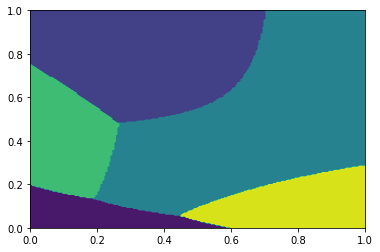

In [ ]:
a1 = np.array([[1.3, -1, -3, -10]])
a2 = np.array([[-1,1.5,3,-1]])
a3 = np.array([[0.4, -0.1, -0.1, 3]])
a4 = np.array([[0.5, -1, 1, -0.1]])
a5 = np.array([[-0.2, 1.5, -1, 0.4]])

#Ygrid is defined as the same as Xgrid, except it has 1 
#at the beginning - this therefore adds a column of ones to the left
Ygrid = np.concatenate([np.ones([npx * npy,1]), Xgrid, np.array([Xgrid[:,0]*Xgrid[:,1]]).T],axis=1) 

#calculate each of the five functions as before
g1 = np.matmul(a1, Ygrid.T) 
g2 = np.matmul(a2, Ygrid.T) 
g3 = np.matmul(a3, Ygrid.T) 
g4 = np.matmul(a4, Ygrid.T) 
g5 = np.matmul(a5, Ygrid.T)
#combine all five functions together
gconc = np.concatenate([g1, g2, g3, g4, g5])

#define an array which will ultimately contain all of the class numbers
omega = np.zeros([1, npx * npy]) 
for i in range(5):
	#define an array which is one if it belongs to class i, 
	#and zero otherwise - set it to ones throughout to start with:
	omhere = np.ones([1, npx*npy]) 
	
	#loop through all of the classes
	for j in range(5):
		#if there is another class with a higher value, set it to zero:
		omhere[0,gconc[i,:]<gconc[j,:]] = 0

	#set values in omega which correspond to omhere == 1 to that 
	#particular category number (i + 1 - remember python is zero indexed). 
	omega[omhere == 1] = i + 1
#put back onto 2D grid so it can easily be plotted
omega = np.reshape(omega, [npx, npy]) 

fig, ax = plt.subplots()
plt.contourf(x1line, x2line, omega)